# Problems Notebook for Applied Statistics 2025
This notebook summarizes my journey towards solving four problems set as part of the Applied Statistics module in the HDip in Computer Science and Data Analytics. The problems cover:

1. [Extending the Lady Tasting Tea Experiment](#problem-1-extending-the-lady-tasting-tea-a-idlady_tea)
2. [Normal distribution](#problem-2-normal-distribution)
3. [t-Tests](#problem-3-t-tests)
4. [ANOVA](#problem-4-anova)



## Standard packages used across the problems
All the packages used across the project are listed in [requirements.txt](https://github.com/kknb1982/applied_statistics/blob/main/requirements.txt) and should be loaded into the environment using the steps laid out in the [README.md](https://github.com/kknb1982/applied_statistics/blob/b965c80369e55a65eba1f46f5a5d6e354610a6dc/README.md). The standard packages are:

* `ipython` supports the running of Python in Jupyter notebooks as outlined in the [official documentation](https://ipython.readthedocs.io/en/stable/)

* `NumPy` is the standard package used for scientific computing in Python ([see the manual](https://numpy.org/doc/2.3/)). Numpy makes it easier to work with data using [arrays](https://numpy.org/doc/2.3/user/absolute_beginners.html) to handle and understand your data.

* `SciPy` is a collection of mathematical functions built on `NumPy`. The functions and sub-packages are laid out in the [SciPy UserGuide](https://docs.scipy.org/doc/scipy/tutorial/index.html#user-guide).

* `statsmodels` is a collection of functions for conducting statistical tests and exploring statistical data as explained in the [User Guide](https://www.statsmodels.org/stable/user-guide.html)

* `matplotlib` is a commonly used package for creating visualisations of data in Python, full details are in the [User Guide](https://matplotlib.org/stable/index.html).

* `pandas` enables fast data analysis and manipulation, see the [User Guide for more information](https://pandas.pydata.org/docs/user_guide/index.html)

* `seaborn` enables the drawing of more complex and informative statistical graphs, see the [website for more information](https://seaborn.pydata.org/).

Other standard library modules are used in this notebook and these will be introduced at the point of usage.

## Problem 1: Extending the Lady Tasting Tea
Firstly, what is the Lady Tasting Tea Problem? This comes from the ["Design of Experiments"](https://archive.org/details/in.ernet.dli.2015.502684/page/n5/mode/2up) by Ronald A Fisher and states a lady can work out from tasting a cup of tea if the milk was added to the cup before or after the tea. The experiment he designed was to create eight cups of tea, half made milk first and half made tea first, and presenting them in a random order to the taster. The taster has the experiment explained so knows that four are made milk first and four are tea first. 

The null hypothesis is that she can't tell the difference between the tea making methods. There is a good explanation of [null hypothesis here](https://www.geeksforgeeks.org/maths/null-hypothesis/). This iteration of the experiment will extend the number of cups of tea to twelve with eight made tea-first and four made milk-first.

### Import the needed tools
To complete this task the following tools are needed:
* `math` to investigate combinations and permutations. Documentation about `math` is available at [https://docs.python.org/3/library/math.html](https://docs.python.org/3/library/math.html). 

* `itertools` to [create iterator blocks](https://docs.python.org/3/library/itertools.html#module-itertools). 

* `random` to randomly select which cups will have the milk added first. The full description of `random` is available at [https://docs.python.org/3/library/random.html](https://docs.python.org/3/library/random.html). 

* `numpy` to evaluate the number of unique selections, see the [user guide](https://numpy.org/doc/2.3/user/index.html#user).

* `matplotlib.pyplot` to plot the outcomes as described in the [user guide](https://matplotlib.org/stable/index.html).

In [157]:
# Mathematical functions from the math module
# https://docs.python.org/3/library/math.html
import math

# Combinatorial functions from the itertools module
# https://docs.python.org/3/library/itertools.html#module-itertools
import itertools

# Random number generation functions from the random module
# https://docs.python.org/3/library/random.html
import random

# Numerical structures and functions from the numpy module
# https://numpy.org/doc/2.3/user/index.html#user
import numpy as np

# Plotting functions from the matplotlib module
# https://matplotlib.org/stable/index.html
import matplotlib.pyplot as plt

### Set the variables for the experiment
The number of cups of tea in total is twelve.

In [158]:
# Number of cups of tea in total
n_cups = 12

The number of the cups made tea-first is eight.

In [159]:
n_tea_first = 8

The number of the cups made milk-first is four.

In [160]:
n_milk_first = 4

### Combinations and permutations
How many different ways are there for the tester to select the four cups made tea first? This kind of experiment looks at combinations and permutations.

Permutations are the different ways the elements can be ordered. For example, a colleague was told the combination for the lock on the stationery cupboard, the remembered digits are 1, 5, 7, 9, none of the digits were repeated, but the order can't be remembered. The different orders of these digits are the permutations eg 1579, 1597, 9715...... The number of different ways of ordering these permutations is four factorial, often written as 4!. This is calculated by 4 * 3 * 2 * 1 = 24. It's going to take a while to get that stationery! For this experiment we do not mind the order in which the cups of tea are selected.

Combinations is a selection of a number of elements from the set. The order does not matter and the same element cannot be selected twice. If we take our stationery cupboard lock again and all we know if no digit is repeated in the code, but no-one knows any of the digits, there are a large number of combinations eg  1234, 1345, 1456 etc. The order does not matter in combinations.

In our tea experiment we are interested in the number of combinations that can be selected from the 12 cups, we are not interested in the order they are selected (permutations). 

In the [`math` library](https://docs.python.org/3/library/math.html) there is the [`comb`](https://docs.python.org/3/library/math.html#math.comb) function which will return the number of ways to choose a set number of items (often denoted as *k*) from *n* items without repeating items or order.  `math.comb()` is written mathematically as: $$\binom{n}{k} = \frac{n!}{k!(n-k)!}$$ In our example n = number of cups in total which is 12 and k = number of cups with milk in first which is 4. The description of `math.comb()` is available at [https://docs.python.org/3/library/math.html#math.comb](https://docs.python.org/3/library/math.html#math.comb).

Let's use the function to work out the number of ways of selecting four cups (those made milk-first) from twelve.

In [161]:
# Number of ways of selecting four cups from twelve.
# https://docs.python.org/3/library/math.html#math.comb
n_ways = math.comb(n_cups, n_milk_first)

# Show the result
n_ways

495

There are 495 different ways of selecting the four cups made milk first. So how does `math.comb` calculate this? If we label each of the cups one to twelve and put out four coasters, the tester is asked to put the milk-first cups on the coasters. For example, cups 3,4,7,11 might be selected. The cups could be placed on the coasters in any order, so 3 4 7 11 is the same and 7 4 11 3. Once a coaster is full it reduces the number of cups to choose from by one. To calculate the number of ways of selecting four cups from twelve is to multiply the number of cups to choose from to fill each coaster. So for coaster A, there are 12 choice and coaster B 11 choices and so on, until all 4 coasters are filled.

In [162]:
# total ways of selecting 4 cups from 12
no_ways_ordered = 12 * 11 * 10 * 9

# Show the result
no_ways_ordered

11880

We don't care about the order so this reduces the number of options. The number of permutations for the four cups is 4! so 4 * 3 * 2 * 1

In [163]:
# Number of ways of putting the four cups on the coasters
n_arrangements = 4 * 3 * 2 * 1

# Show the result
n_arrangements

24

To get the number of ways of selecting the four cups with no regard to the order they are selected is calculated by dividing the number of ways ordered by the number of arrangements of those selected, so 11880 / 24. To divide in python we use [`//`](https://www.geeksforgeeks.org/python/division-operators-in-python/) when dividing whole numbers (integers).

In [164]:
# Number of combinations of selecting 4 cups from 12
n_combinations = no_ways_ordered // n_arrangements

# Show the result
n_combinations

495

This step by step approach matches the `math.comb()` function. This maths could also have been completed by using `math.factorial` described at [https://docs.python.org/3/library/math.html#math.factorial](https://docs.python.org/3/library/math.html#math.factorial). Factorial means multiplying from the start integer sequentially down to one. The notation is the start number followed by !. Therefore, the number of cups milk-first is calculated by 4! or 4 x 3 x 2 x 1. There is a good decription of factorial numbers at [https://www.geeksforgeeks.org/maths/factorial/](https://www.geeksforgeeks.org/maths/factorial/)

In [165]:
# Another way of calculating the number of arrangements of 4 cups is to use the factorial function from the math library
# https://docs.python.org/3/library/math.html#math.factorial
no_arrangements = math.factorial(n_milk_first)
no_arrangements

24

We need to know the number of ways of organising the tea-first cups.

In [166]:
# Calculate the number of ways of organising the tea first cups
no_ways_tea_first = math.factorial(n_tea_first)
no_ways_tea_first

40320

There are 12 cups, so work out the number of ways of calculating the ordering of the 12 cups, calculate `12!`.

In [167]:
# Calculate the number of ways of organising all the cups
no_ways = math.factorial(n_cups)
no_ways


479001600

To calculate the number of combinations of selecting the 4 cups from 12. We divide the number of ways of organising all the cups by the product of the number of arrangement of milk-first and tea-first.

In [168]:
# Calculate the number of combinations of selecting 4 cups from 12
number_combinations = no_ways // (no_arrangements * no_ways_tea_first)

# Show the result
number_combinations

495

Using this different methodology, we again get the answer 495. Now let's set up our extended experiment and simulate the outcomes.

### Setting up the experiment
The first task is assigning cup labels. `range` is used to generate a sequence of numbers, up to the number of cups as described in the [user documentation](https://docs.python.org/3/library/functions.html#func-range). The output of this is then turned into a `list` which can be iterated through in later steps, [user documentation for lists](https://docs.python.org/3/library/stdtypes.html#typesseq-list).

In [169]:
# Assign the cup labels
# https://docs.python.org/3/library/stdtypes.html#typesseq-list
# https://docs.python.org/3/library/functions.html#func-range

labels = list(range(n_cups))

# Show the result
labels

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

To calculate the number of way of selecting the number of cups made milk first out of all the cups we can use the function `itertools.combinations` ([official documentation])(https://docs.python.org/3/library/itertools.html#itertools.combinations). 

In [170]:
# Show the different ways of selecting the cups made milk first from all the cups
# https://docs.python.org/3/library/itertools.html#itertools.combinations
combs = list(itertools.combinations(labels, n_milk_first))

# Show the result
combs

[(0, 1, 2, 3),
 (0, 1, 2, 4),
 (0, 1, 2, 5),
 (0, 1, 2, 6),
 (0, 1, 2, 7),
 (0, 1, 2, 8),
 (0, 1, 2, 9),
 (0, 1, 2, 10),
 (0, 1, 2, 11),
 (0, 1, 3, 4),
 (0, 1, 3, 5),
 (0, 1, 3, 6),
 (0, 1, 3, 7),
 (0, 1, 3, 8),
 (0, 1, 3, 9),
 (0, 1, 3, 10),
 (0, 1, 3, 11),
 (0, 1, 4, 5),
 (0, 1, 4, 6),
 (0, 1, 4, 7),
 (0, 1, 4, 8),
 (0, 1, 4, 9),
 (0, 1, 4, 10),
 (0, 1, 4, 11),
 (0, 1, 5, 6),
 (0, 1, 5, 7),
 (0, 1, 5, 8),
 (0, 1, 5, 9),
 (0, 1, 5, 10),
 (0, 1, 5, 11),
 (0, 1, 6, 7),
 (0, 1, 6, 8),
 (0, 1, 6, 9),
 (0, 1, 6, 10),
 (0, 1, 6, 11),
 (0, 1, 7, 8),
 (0, 1, 7, 9),
 (0, 1, 7, 10),
 (0, 1, 7, 11),
 (0, 1, 8, 9),
 (0, 1, 8, 10),
 (0, 1, 8, 11),
 (0, 1, 9, 10),
 (0, 1, 9, 11),
 (0, 1, 10, 11),
 (0, 2, 3, 4),
 (0, 2, 3, 5),
 (0, 2, 3, 6),
 (0, 2, 3, 7),
 (0, 2, 3, 8),
 (0, 2, 3, 9),
 (0, 2, 3, 10),
 (0, 2, 3, 11),
 (0, 2, 4, 5),
 (0, 2, 4, 6),
 (0, 2, 4, 7),
 (0, 2, 4, 8),
 (0, 2, 4, 9),
 (0, 2, 4, 10),
 (0, 2, 4, 11),
 (0, 2, 5, 6),
 (0, 2, 5, 7),
 (0, 2, 5, 8),
 (0, 2, 5, 9),
 (0, 2, 5, 10),
 (

This has produced so many results, `len` can be used to count the number of combinations. `len` counts the number of items in an object as described at [https://docs.python.org/3/library/functions.html#len](https://docs.python.org/3/library/functions.html#len)

In [171]:
# Number of combinations
# https://docs.python.org/3/library/functions.html#len
len(combs)

495

Brilliant, we got 495 combinations, the same as when we calculated the outcome purely mathematically by using `math.comb()`. 

To randomly choose which ones will have the milk added first use the python function `random.sample`, see the [official documentation](https://docs.python.org/3/library/random.html#random.sample). `random.sample()` will return a list items randomly selected from the group of the length specified. So the two arguments needed are what do you want me to select from and how many do you want. For this experiment the list is `labels` and the number to select is `n_milk_first`.

In [172]:
# Select which cups have milk added first
# https://docs.python.org/3/library/random.html#random.sample
labels_milk_first = random.sample(labels, n_milk_first)

# Show the result
labels_milk_first

[6, 5, 1, 8]

The cup number listed above, have been randomly chosen to be made milk-first. In selecting the cups, it does not matter the order they are selected, only that they are put in the group proposed as being made milk-first.

### The null hypothesis
A null hypothesis is the commonly accepted fact (the lady can tell which cups are made milk-first) and our experiment is designed to test whether this is true. The alternate hypothesis is that she cannot tell which are made milk-first and the selections are basically random. There is a great description of what is a null hypothesis and examples at [https://www.statisticshowto.com/probability-and-statistics/null-hypothesis/](https://www.statisticshowto.com/probability-and-statistics/null-hypothesis/).

Let's make our list of cups with the milk added first into a `set`, [see official documentation](https://docs.python.org/3/tutorial/datastructures.html#sets).

In [173]:
# Turn labels_milk_first into a set
# https://docs.python.org/3/tutorial/datastructures.html#sets
set_milk_first = set(labels_milk_first)

# Show the result
set_milk_first

{1, 5, 6, 8}

Now let's calculate the overlap between each element of the possible combinations saved as combs and set_milk_first. We can do this by first creating an empty list called no_overlaps.

In [174]:
# create an empty list to hold the number of overlaps
no_overlaps = []

Then loop through the combinations, in each loop take one of the combinations and turn it into a set and find out if there is an overlap with the milk-first set. The answer of this is then printed to the notebook, showing the combination, the number of overlapping items and which items overlap. The outcome of these calculations are added to the no_overlaps list.

In [175]:
# Loop through the combinations.
for comb in combs:
    # Turn comb into a set.
    s1 = set(comb)
    # Figure out where comb overlaps with set_milk_first.
    overlap = s1.intersection(set_milk_first)
    # Show the combination and the overlap.
    print(comb, len(overlap), overlap)
    # Append overlap to no_overlaps.
    no_overlaps.append(len(overlap))

(0, 1, 2, 3) 1 {1}
(0, 1, 2, 4) 1 {1}
(0, 1, 2, 5) 2 {1, 5}
(0, 1, 2, 6) 2 {1, 6}
(0, 1, 2, 7) 1 {1}
(0, 1, 2, 8) 2 {8, 1}
(0, 1, 2, 9) 1 {1}
(0, 1, 2, 10) 1 {1}
(0, 1, 2, 11) 1 {1}
(0, 1, 3, 4) 1 {1}
(0, 1, 3, 5) 2 {1, 5}
(0, 1, 3, 6) 2 {1, 6}
(0, 1, 3, 7) 1 {1}
(0, 1, 3, 8) 2 {8, 1}
(0, 1, 3, 9) 1 {1}
(0, 1, 3, 10) 1 {1}
(0, 1, 3, 11) 1 {1}
(0, 1, 4, 5) 2 {1, 5}
(0, 1, 4, 6) 2 {1, 6}
(0, 1, 4, 7) 1 {1}
(0, 1, 4, 8) 2 {8, 1}
(0, 1, 4, 9) 1 {1}
(0, 1, 4, 10) 1 {1}
(0, 1, 4, 11) 1 {1}
(0, 1, 5, 6) 3 {1, 5, 6}
(0, 1, 5, 7) 2 {1, 5}
(0, 1, 5, 8) 3 {8, 1, 5}
(0, 1, 5, 9) 2 {1, 5}
(0, 1, 5, 10) 2 {1, 5}
(0, 1, 5, 11) 2 {1, 5}
(0, 1, 6, 7) 2 {1, 6}
(0, 1, 6, 8) 3 {8, 1, 6}
(0, 1, 6, 9) 2 {1, 6}
(0, 1, 6, 10) 2 {1, 6}
(0, 1, 6, 11) 2 {1, 6}
(0, 1, 7, 8) 2 {8, 1}
(0, 1, 7, 9) 1 {1}
(0, 1, 7, 10) 1 {1}
(0, 1, 7, 11) 1 {1}
(0, 1, 8, 9) 2 {8, 1}
(0, 1, 8, 10) 2 {8, 1}
(0, 1, 8, 11) 2 {8, 1}
(0, 1, 9, 10) 1 {1}
(0, 1, 9, 11) 1 {1}
(0, 1, 10, 11) 1 {1}
(0, 2, 3, 4) 0 set()
(0, 2, 3, 5) 1 {5}
(0, 2,

Due to the number of potential ways of selecting the four cups, this is a very long list. If we only print the number of overlaps we can see that getting more than two cups correctly identified as made milk-first is quite rare, but how rare.

In [176]:
# Show the overlaps
print(no_overlaps)

[1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 3, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 3, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 3, 4, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 0, 1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 

This can be calculated using the `numpy` function `unique`, see [official documentation](https://numpy.org/doc/stable/reference/generated/numpy.unique.html). `np.unique` identifies the unique values in the array and by adding the parameter `return_counts` we can see the number of times that unique value is returned. This is far easier than looking at a full list.

In [177]:
# Count the number of times each overlap occurs.
# https://numpy.org/doc/stable/reference/generated/numpy.unique.html
counts = np.unique(no_overlaps, return_counts=True)

# Show.
counts

(array([0, 1, 2, 3, 4]), array([ 70, 224, 168,  32,   1], dtype=int64))

To make this information even easier to understand we can plot it as a bar chart using `matplotlib.pyplot.subplots`, see [official documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html). The parameter `figsize` sets the size of the plot.

Then to this figure we plot our count data, setting the number of cups correctly identified as milk-first as the x-axis and the number of times that combination occurs on the y-axis.

Text(0.5, 0, 'Number of Cups Correctly Identified as Milk-First')

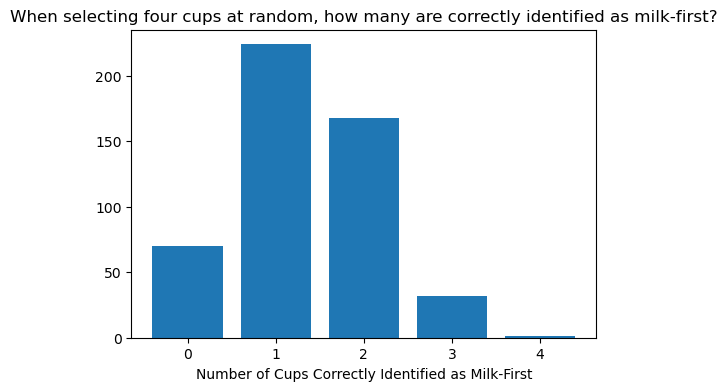

In [178]:
# Create a blank figure
fig, ax = plt.subplots(figsize=(6, 4))

# Create a bar chart with our count data
ax.bar(counts[0], counts[1])
plt.title('When selecting four cups at random, how many are correctly identified as milk-first?')
plt.xlabel('Number of Cups Correctly Identified as Milk-First')

From our count, it is clear there is only 1 way to get all four cups correctly identified. Using the `n_ways` variable created earlier we can see that the probability of making the selection with all four cups correctly identified as milk-first is quite rare.

In [179]:
# The probability of getting all four correct by chance is 1 in 495.
1/n_ways

0.00202020202020202

In the original experiment the probability of selecting all four cups correctly was 0.14, so this extension of the test has made it far harder to correctly identify the four cups made milk-first by chance alone. In the original experiment the chance of getting three or more cups correctly identified was 0.24 and hence Fisher said that all four cups must be correctly identified as being made milk-first to be significant. Let's see what the chance of 3 or more cups being correct is in our extended experiment.

In [180]:
# The probability of getting three or more correct by chance is
(1 + 33) / n_ways

0.06868686868686869

The probability of getting at least three cups correct in our extended experiments is 0.0687. 

When testing a null hypothesis we use the p-value. The smaller the p-value means the results may not support the null hypothesis. The cut-off used is often 0.05. How to calculate the p-value and its significance is well explained in [https://www.simplypsychology.org/p-value.html](https://www.simplypsychology.org/p-value.html) and we will be looking at this in more detail in the later problems. However, for the lady tasting experiment it is still unlikely that three cups are correctly identified as being made milk-first by chance, but it is over the normal 0.05 threshold, so to be confident that the null hypothesis is true we will still need to see all four cups correctly identified.

## Problem 2: Normal Distribution
[Normal distribution](https://www.geeksforgeeks.org/maths/normal-distribution/) is the most common distribution of data variables. Normal distribution  is often used to represent a larger number of random variables and describes many natural phenomena such as the height of adults. The distribution is symmetrical about its centre and makes a distinctive bell curve.

In this problem we are going to generate 100,000 samples of size 10. Then for each sample, compute the standard deviation with sample standard deviation of one and population standard deviation of 0. To help compare the outcomes they will be plotted.

First let's import the tools we need:
* `numpy` to allow us to work with the binomial distribution of flipping the coin eg heads or tails, [official documentation](https://numpy.org/doc/2.3/)
* `matplotlib.pyplot` to plot the data, [see the user guide](https://matplotlib.org/stable/index.html)
* `scipy.stats` for statistics, [see the user guide](https://docs.scipy.org/doc/scipy/reference/stats.html)
* `statsmodels` for the statistical modelling, see the [user guide](https://www.statsmodels.org/stable/user-guide.html)

In [ ]:
# Binomial distribution of flipping a coin
# https://numpy.org/doc/2.3/
import numpy as np

# Plotting functions from the matplotlib module
# https://matplotlib.org/stable/index.html
import matplotlib.pyplot as plt

# Statistical functions from the scipy.stats module
# https://docs.scipy.org/doc/scipy/reference/stats.html
import scipy.stats as stats

# Statistical modelling functions from the statsmodels module
# https://www.statsmodels.org/stable/user-guide.html
import statsmodels as sm

# Data visualization functions from the seaborn module
# https://seaborn.pydata.org/
import seaborn as sns

### Probability Density Function
First, let's look into what the [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) is in more detail. A normal distribution is a symmetrical, bell shaped curve. When describing a normal distribution we normally denote the mean as $\mu$ and the variance described by $\sigma^{2}$. $\sigma$ is the standard deviation. 

When plotted as a graph the area under the curve represents the probability, $\mu$ the peak of the curve and the spread by $\sigma^{2}$. A low $\sigma^{2}$ is a sharp peak and high $\sigma^{2}$ is a more spread-out curve. A standard normal distribution has a $\sigma^{2}$ value of 1. 

Now let's create a normal distribution and plot this as a curve on the above plot.

  
The probability density function (PDF) of a normal distribution is:

$$
f(x) = \frac{1}{\sigma \sqrt{2\pi}} \, e^{ -\frac{(x - \mu)^2}{2\sigma^2} }
$$

Where:
- $\mu$ = mean  
- $\sigma$ = standard deviation  
- $x$ = variable

We can create a function for this equation that takes in the three parameters, $x$, $\mu$ and $\sigma$ to do the calculation. If you are not familiar with defining a function [w3 schools has a great resource](https://www.w3schools.com/python/python_functions.asp). To solve the equation we will need `numpy.sqrt`, [see the official documentation](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html) and `numpy.pi`, $\pi$[for pi](https://numpy.org/doc/stable/reference/constants.html#numpy.pi) to calculate the normalisation constant. The result of this is then multiplied by the exponential part of the equation. Exponents can be calculated in python using [`numpy.exp`](https://numpy.org/doc/stable/reference/generated/numpy.exp.html#numpy.exp). Exponents are well described in [https://www.cuemath.com/algebra/exponents/](https://www.cuemath.com/algebra/exponents/).

$\sigma$ is the standard deviation of the data. Standard deviation describes the spread of the data away from the mean. A low standard deviation means the values are relatively consistent and close to the mean. A high standard deviation mean the data points are more spread out. There is a helpful description of standard deviation at [https://www.geeksforgeeks.org/maths/standard-deviation-formula/](https://www.geeksforgeeks.org/maths/standard-deviation-formula/). The mathematical formula for standard deviation is:

$$
\sigma = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \bar{x})^2}{n}}
$$

where:
- $\bar{x}$ is the mean
- n = number of observations

First, let's define a function for the normal distribution. When coding in Python use the English names for these Greek letters so $\mu$ is `mu` and $\sigma$ is `sigma`.


In [182]:
# Define a function for the normal distribution
# https://en.wikipedia.org/wiki/Normal_distribution
# Define the function with the parameters x, mu and sigma
def f(x, mu=0.0, sigma=1.0):
  """Calculate the probability density function of a normal distribution.
    
    Parameters:
        x: Variable value(s)
        mu: Mean of the distribution (default 0.0)
        sigma: Standard deviation (default 1.0)
        
    Returns:
        The PDF value(s) at x
    """
  # Calculate the normalisation constant.
  # https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html
  # https://numpy.org/doc/stable/reference/constants.html#numpy.pi
  
  norm = 1.0 / np.sqrt(2.0 * np.pi * sigma**2)
  
  # Return the result f(x)
  # https://numpy.org/doc/stable/reference/generated/numpy.exp.html#numpy.exp
  return norm * np.exp(-(x - mu)**2 / (2.0 * sigma**2))

Now let's test the function.

In [183]:
# Test the function.
f(0.0)

0.3989422804014327

To plot the normal distribution we create an x range of data with `numpy.linspace` [official documentation](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) which returns evenly spaced numbers over a specified interval. The function requires two parameters, where to start and where to stop. How many returns is automatically set to 50, but for a nice smooth curve that runs from one limit to another I'm going to set it to 1001. 

In [184]:
# Create an x range
# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
x = np.linspace(-5.0, 5.0, 1001)

# Get y values.
y = f(x)

# Show.
x,y

(array([-5.  , -4.99, -4.98, ...,  4.98,  4.99,  5.  ]),
 array([1.48671951e-06, 1.56286711e-06, 1.64275059e-06, ...,
        1.64275059e-06, 1.56286711e-06, 1.48671951e-06]))

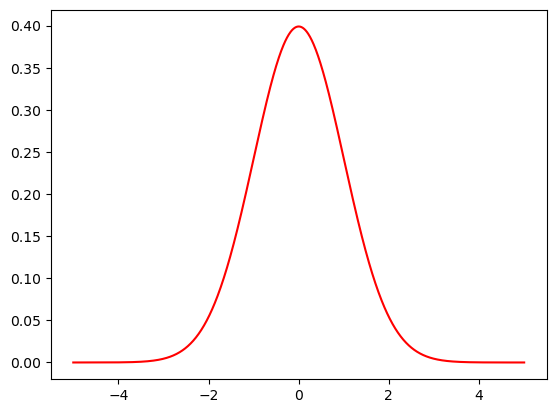

In [185]:
# Create an empty plot.
# https://matplotlib.org/stable/users/explain/axes/index.html
fig, ax = plt.subplots()

# Plot the function.
ax.plot(x, y, 'r')

#### Arithmetic mean
The mean is sum of a collection of numbers divided by the count of numbers in the collection. This can be calculated with `numpy.mean`, the [official documentation](https://numpy.org/doc/stable/reference/generated/numpy.mean.html#numpy.mean) describes the possible parameters. For now let's run function on our generated data.

In [186]:
# calculate the mean
# https://numpy.org/doc/stable/reference/generated/numpy.mean.html#numpy.mean
mean = np.mean(x)

# Show the mean
mean

0.0

#### Standard deviation
The [standard deviation](https://en.wikipedia.org/wiki/Standard_deviation) shows the spread of the data, it acts as a measure of the amount of variation of the values around the mean.

$$
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}
$$

where:
- $\sigma$ = population standard deviation
- $\mu$ is the population mean
- N is the number of observations

To calculate the standard deviation in Python we can use `numpy.std`, see the [official documentation for more details on the parameters](https://numpy.org/doc/stable/reference/generated/numpy.std.html). 

In [187]:
# Calculate the standard deviation
# https://numpy.org/doc/stable/reference/generated/numpy.std.html#numpy.std
sigma = np.std(x)

# Show the standard deviation
sigma

2.8896366553599777

Now let's add all this data to our plot.

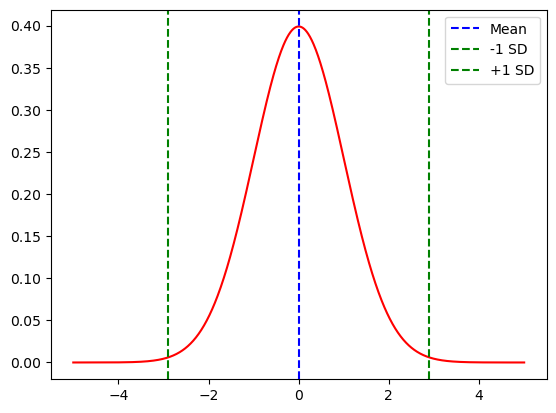

In [188]:
# Create an empty plot.
# https://matplotlib.org/stable/users/explain/axes/index.html
fig, ax = plt.subplots()

# Plot the function.
ax.plot(x, y, 'r')

# Plot the mean
ax.axvline(mean, color='b', linestyle='--', label='Mean')

# Plot the standard deviations
ax.axvline(mean - sigma, color='g', linestyle='--', label='-1 SD')
ax.axvline(mean + sigma, color='g', linestyle='--', label='+1 SD')

# Show the legend
ax.legend()

### Using numpy normal function
Instead of defining the function we could use `numpy.random.normal` [see official documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). This randomly generates data for a normal distribution in line with the given parameters. The documentation recommends that we should generate our own random number generator, but for now let's look at `numpy.random.normal`. The parameters are:
* loc = centre of the distribution
* scale = spread or  standard deviation of the distribution
* size = sets the number of the outputs

In [189]:
# Randomly generate data for a normal distribution
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
np.random.normal(1,0.5,10)

array([0.39583636, 0.72621735, 1.00076898, 0.94730653, 0.72732777,
       0.66417182, 0.24105558, 1.90750071, 0.48396028, 1.12766354])

Now get the y values using the function f we previously described.

In [190]:
# Get y values
y = f(x, mu=0.0, sigma=1.0)

Now plot it all on one chart.

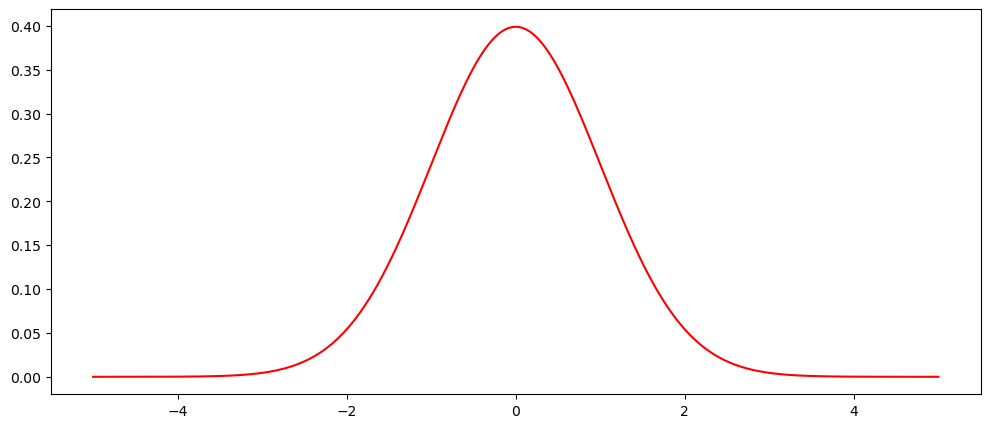

In [191]:
# Create the empty plot
fig, ax = plt.subplots(figsize=(12, 5))

# Plot the function for the binomial distribution
ax.plot(x, y, 'r-')


### Generate a normal distribution of 10 data points, 100,000 times
Now let's use `numpy.random.normal` to generate a normal distribution with 10 data points, 100,000 times. The [official documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) for this function shows it takes three parameters loc, scale and size. Loc is the mean or centre of the distribution, scale is the standard deviation or spread of the data and size gives us the number of outputs. Creating these outputs mimics sampling a population. This is often the way surveys and medical trials work, by collecting an intensive data set from a small subset to make assumptions about a larger population. 

In [192]:
# Generate a random normal sample with groups of 10 data points
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
data = np.random.normal(size=(100000,10))

# Show
data

array([[ 1.57937942e+00,  1.06926410e+00,  1.75270899e+00, ...,
        -1.81367298e-01,  2.71687316e-01, -7.93960309e-01],
       [ 3.78148507e-01, -2.82088393e-01,  2.39358336e+00, ...,
        -2.28182030e-03,  1.09410016e+00,  2.09167636e-01],
       [ 1.94647744e+00, -1.31765139e-01, -1.30825024e-01, ...,
         1.43124401e+00, -1.22052588e+00,  1.99227901e+00],
       ...,
       [-2.24829208e-01,  5.79560006e-02, -2.94146545e-01, ...,
        -1.53972741e+00, -1.06659315e+00, -2.30500512e-01],
       [-1.30130085e+00,  1.14861751e+00, -1.02597140e+00, ...,
        -9.86208898e-02,  3.19140119e-01,  2.05303032e-01],
       [ 9.39142457e-02,  1.44475237e+00, -3.19422755e-01, ...,
         4.14055338e-01, -1.26091845e+00,  1.47178754e+00]])

To calculate the mean of each of the samples we set the `numpy.mean` parameter to `axis=1` , [see official documentation](https://numpy.org/doc/stable/reference/generated/numpy.mean.html). 

In [193]:
# Calculate the mean
# https://numpy.org/doc/stable/reference/generated/numpy.mean.html
means = np.mean(data, axis=1)

# Show the mean
means

array([-0.09505358,  0.53336458,  0.55121335, ..., -0.44657586,
       -0.1151187 ,  0.17555164])

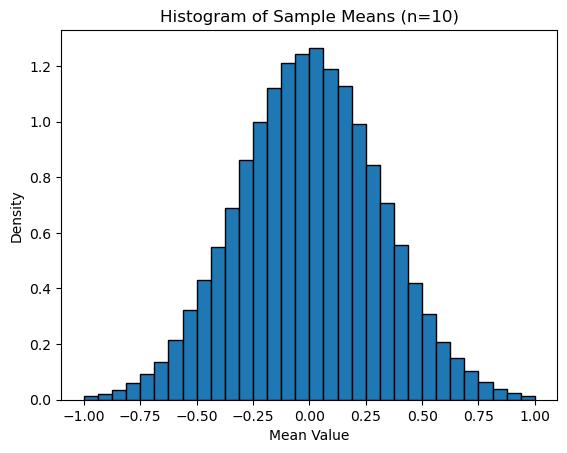

In [194]:
# Create a blank figure
fig, ax = plt.subplots()

# Create a histogram of the means data
# https://matplotlib.org/stable/plot_types/stats/hist_plot.html
# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
ax.hist(means, edgecolor='black', bins=np.linspace(-1.0,1.0,33), density=True)

# Label the plot
plt.title('Histogram of Sample Means (n=10)')
plt.xlabel('Mean Value')
plt.ylabel('Density')

# Show the data
plt.show()

This plot shows that each of the sample picked my have a variation in mean, but when the data for multiple samples are plotted they centre around the mean.

### Sample and population standard deviations
The problem asks for the sample standard deviation to be set to `ddof=1` and with `ddof=0` for population standard deviation. What is the difference between population and sample standard deviations? There is a good description of the difference on [statology](https://www.statology.org/population-vs-sample-standard-deviation/).

**Population Standard Deviation Formula:**

$$
\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2}
$$

Where:
- $\sigma$ = population standard deviation
- $\mu$ = population mean
- $N$ = number of observations in the population
- $x_i$ = each individual value

**Sample Standard Deviation Formula:**
$$
s = \sqrt{\frac{\sum_{i=1}^n (x_i - \bar{x})^2}{n - 1}}
$$

The sample deviation should be used when the dataset representation a sample taken from a larger population of interest.The difference between the two formula is that for the sample standard deviation the divisor is n-1 rather than N. This is because when we calculate the sample standard deviation, we tend to underestimate the actual variability of the population.

### The effect of the different ddof values
Let's demonstrate the effect of the ddof on some sample data created with `numpy.array`, see [official documentation](https://numpy.org/doc/stable/reference/generated/numpy.array.html).

In [195]:
# Create data array
# https://numpy.org/doc/stable/reference/generated/numpy.array.html
ddof_example = np.array([1, 2, 3, 4, 5])


Now calculate the standard deviation of that data with `ddof=1` using `numpy.std`, see [official documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html.)

In [196]:
# Calculate the standard deviation with ddof=1
# https://numpy.org/doc/stable/reference/generated/numpy.std.html
std_ddof1 = np.std(ddof_example, ddof=1)

Complete the same action with the same data, but this time with a ddof of 0.

In [197]:
# Calculate the standard deviation with ddof=0
std_ddof0 = np.std(ddof_example, ddof=0)

Now let's plot the outcomes on a simple chart.

<BarContainer object of 2 artists>

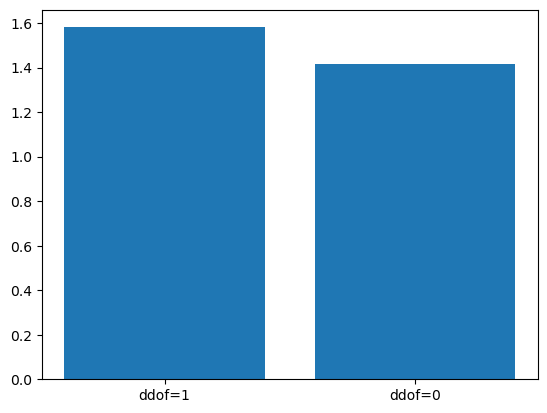

In [198]:
# Plot the results
labels = ['ddof=1', 'ddof=0']
std_values = [std_ddof1, std_ddof0]
fig, ax = plt.subplots()
ax.bar(labels, std_values)


From this chart, we can see that the ddof of 1 is showing a higher standard deviation. 

### Standard deviations for our data set using ddof=0 and ddof=1
Let's process the previously generated data and compute the standard deviation for each sample using these two different `ddof` values, using `numpy.std`, [see official documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html)

In [199]:
# Compute standard deviations for each sample using dd0f=0
# https://numpy.org/doc/stable/reference/generated/numpy.std.html
sample_sd_pop = np.std(data, axis=1, ddof=0)

# Compute standard deviations for each sample using dd0f=1
# https://numpy.org/doc/stable/reference/generated/numpy.std.html
sample_sd_sample = np.std(data, axis=1, ddof=1)

print(f"Mean of population SD estimates: {np.mean(sample_sd_pop):.4f}")
print(f"Mean of sample SD estimates: {np.mean(sample_sd_sample):.4f}")
print(f"True population standard deviation: 1.0000")

Mean of population SD estimates: 0.9241
Mean of sample SD estimates: 0.9741
True population standard deviation: 1.0000


Let's plot this information on the same axes to visualise the difference. To make the two datasets easier to visualise when overlayed we can change the parameter `alpha` to increase transparency and set the `color` for each dataset, [see official documentation](https://matplotlib.org/stable/plot_types/stats/hist_plot.html).

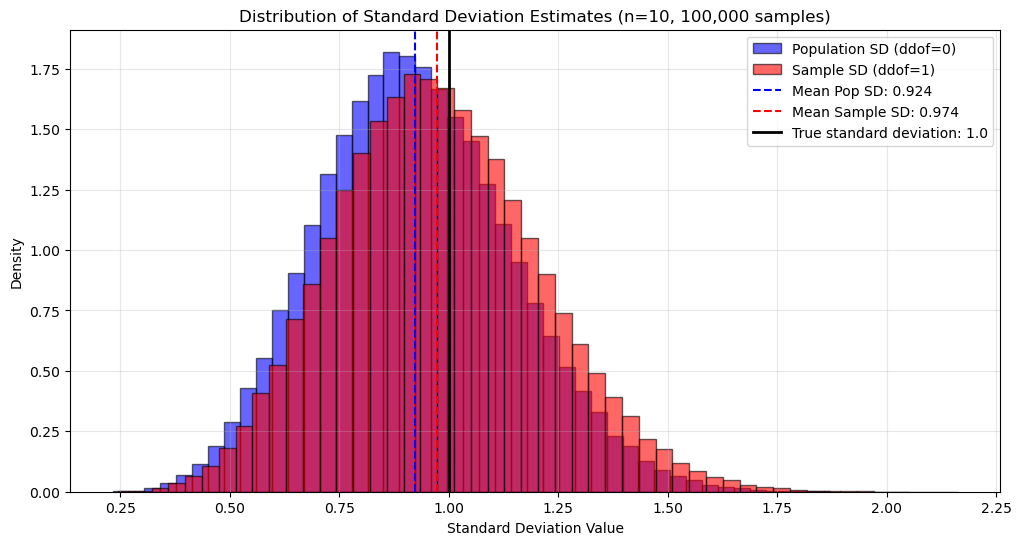

In [ ]:
# Create a blank figure
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig, ax = plt.subplots(figsize=(12, 6))

# Plot both histograms with transparency
# https://matplotlib.org/stable/plot_types/stats/hist_plot.html
ax.hist(sample_sd_pop, bins=50, alpha=0.6, label='Population SD (ddof=0)', color='blue', density=True, edgecolor='black')
ax.hist(sample_sd_sample, bins=50, alpha=0.6, label='Sample SD (ddof=1)', color='red', density=True, edgecolor='black')

# Add vertical lines showing the means
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html
ax.axvline(np.mean(sample_sd_pop), color='blue', linestyle='--', label=f'Mean Pop SD: {np.mean(sample_sd_pop):.3f}')
ax.axvline(np.mean(sample_sd_sample), color='red', linestyle='--', label=f'Mean Sample SD: {np.mean(sample_sd_sample):.3f}')
ax.axvline(1.0, color='black', linestyle='-', linewidth=2, label='True standard deviation: 1.0')

# Setting labels and title
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html
ax.set_xlabel('Standard Deviation Value')
ax.set_ylabel('Density')
ax.set_title('Distribution of Standard Deviation Estimates (n=10, 100,000 samples)')
ax.legend()
ax.grid(True, alpha=0.3)

This chart may actually look better and the code be simpler if `seaborn` was used. `Seaborn` uses comparatively simple syntax, which can be easier to read, it is also more effective at handling Pandas dataframes. There is a really good article at [https://www.geeksforgeeks.org/python/difference-between-matplotlib-vs-seaborn/](https://www.geeksforgeeks.org/python/difference-between-matplotlib-vs-seaborn/) to help decide when to use Matplotlib or Seaborn.

To plot the data as a histogram again let's use `seaborn.histplot`, see [official documentation](https://seaborn.pydata.org/generated/seaborn.histplot.html). With this function we can set the parameter `kde` to True to automatically draw a smooth line for the distribution. Setting the `stat` to density means that the total area of the histogram equals 1.0. 

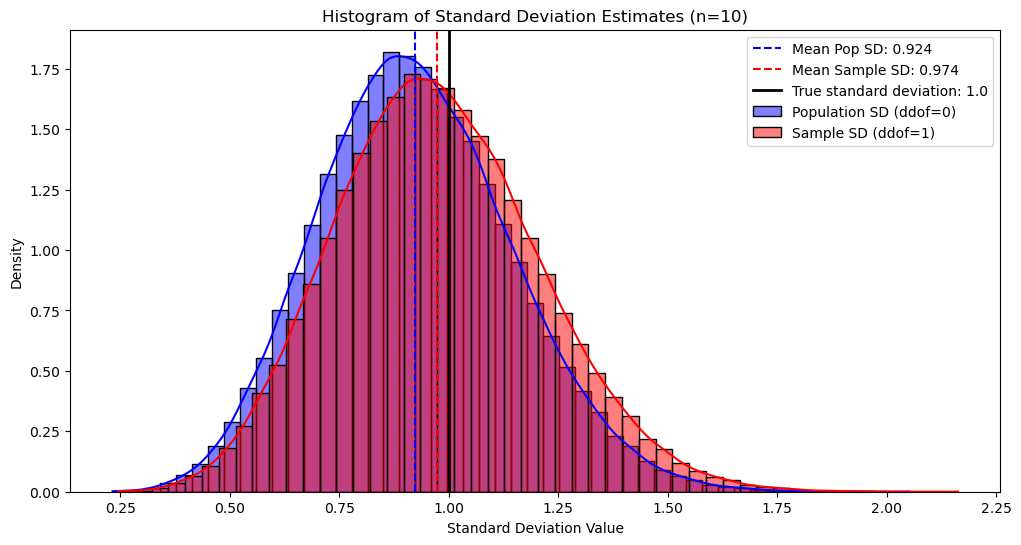

In [235]:
# Create a blank figure
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html
fig, ax = plt.subplots(figsize=(12, 6))

# Plot the data using seaborn
# https://seaborn.pydata.org/generated/seaborn.histplot.html
sns.histplot(sample_sd_pop, bins=50, kde=True, label='Population SD (ddof=0)', color='blue', stat='density')
sns.histplot(sample_sd_sample, bins=50, kde=True, label='Sample SD (ddof=1)', color='red', stat='density')

# Add vertical lines showing the means
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.axvline.html
ax.axvline(np.mean(sample_sd_pop), color='blue', linestyle='--', label=f'Mean Pop SD: {np.mean(sample_sd_pop):.3f}')
ax.axvline(np.mean(sample_sd_sample), color='red', linestyle='--', label=f'Mean Sample SD: {np.mean(sample_sd_sample):.3f}')
ax.axvline(1.0, color='black', linestyle='-', linewidth=2, label='True standard deviation: 1.0')

# Label the plot
plt.title('Histogram of Standard Deviation Estimates (n=10)')
plt.xlabel('Standard Deviation Value')
plt.legend()

So by using seaborn it was far easier to add a line showing the data trend, plot it as a density plot and have the legend show the actual means.

### Analysis of Results
This plot indicates that the standard deviation using the population standard deviation has moved further away from the true standard deviation than when using `ddof=1`. It shows that the population standard deviation (ddof=0) consistently underestimates the true population standard deviation (σ = 1.0). The sample standard deviation (ddof=1) provides an less biased estimate much closer to the true value. This change is called bias. When the means are reviewed, the population standard deviation (ddof=0) is approximately 0.92, when the sample deviation is around 0.97 and the true deviation is 1.0.  

The shape of the two plots are very similar, but the population standard deviation is slightly skewed to the left and the data for the sample standard deviation is showing slightly higher variance.

### Is a bigger sample more accurate?
A bigger sample size should reduce the bias. Let's test this theory, with sample size 10 as before, plus 20, 50 and 100. First let's create a variable for the sample sizes and the number of samples.

In [246]:
# Set the variable for sample sizes
sample_sizes = [10, 20, 50, 100]

# Set the variable for the number of samples
n_samples = 100000

Create a blank `list` to hold the information, see [official documentation](https://docs.python.org/3/tutorial/datastructures.html).

In [ ]:
# Create a list to hold records
# https://docs.python.org/3/tutorial/datastructures.html
records = []

Now iterate over the sample sizes using a `for` loop([see official documentation](https://wiki.python.org/moin/ForLoop)) to generate normal data for each sample size using `numpy.random.normal`,  [see official documentation](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html). Then for each sample size calculate the standard deviation using `ddof=1` and `ddof=0`, [see official documentation](https://numpy.org/doc/stable/reference/generated/numpy.std.html). Once the data is generated `.append()` the data to the list, [see official documentation](https://docs.python.org/3/tutorial/datastructures.html). 

In [ ]:
# Iterate over sample sizes and compute standard deviations
# 
for n in sample_sizes:
    # Generate random samples
    # https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
    samples = np.random.normal(size=(n_samples, n))
    
    # Calculate population and sample standard deviations
    pop_sd = samples.std(axis=1, ddof=0)
    samp_sd = samples.std(axis=1, ddof=1)
    
    records.extend([
        *[(n, "Population SD (ddof=0)", v) for v in pop_sd],
        *[(n, "Sample SD (ddof=1)", v) for v in samp_sd],
    ])

df = pd.DataFrame(records, columns=["Sample Size", "Estimator", "SD"])

To make the data easier to work with let's save it to a `pandas.DataFrame`, see [official documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). We can use the parameter `columns` to set the header for the columns in the dataframe.

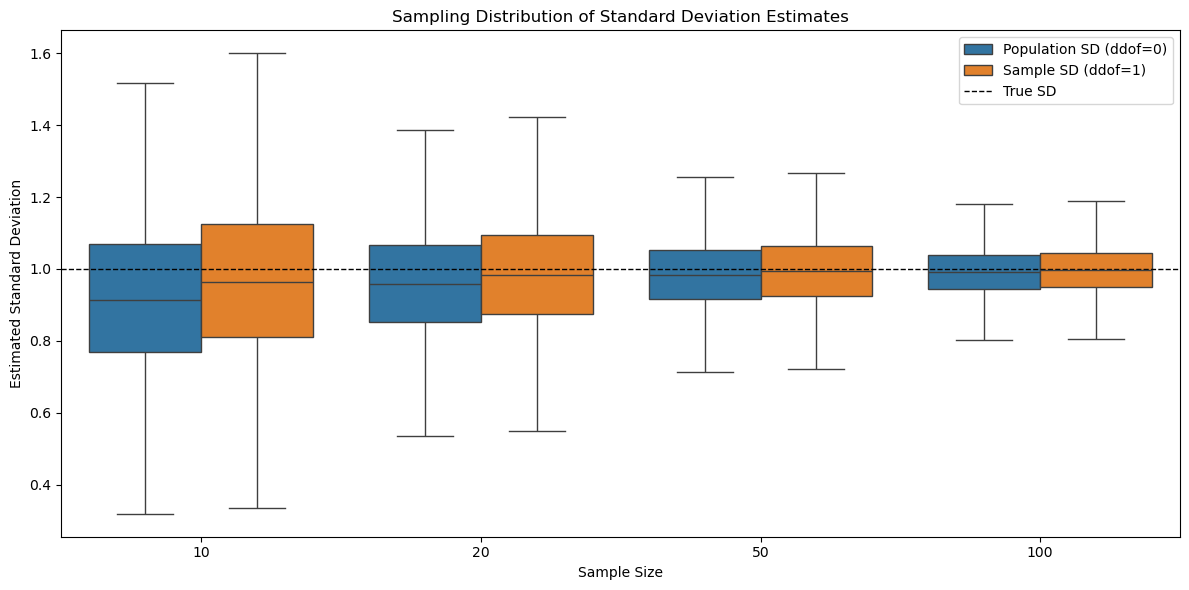

In [249]:
plt.figure(figsize=(12, 6))

sns.boxplot(
    data=df,
    x="Sample Size",
    y="SD",
    hue="Estimator",
    showfliers=False
)

plt.axhline(1, color="black", linestyle="--", linewidth=1, label="True SD")
plt.title("Sampling Distribution of Standard Deviation Estimates")
plt.ylabel("Estimated Standard Deviation")
plt.legend()
plt.tight_layout()
plt.show()

Now let's plot the data. A histogram would look really confusing for this data, with so many overlapping plots, so instead we will use a boxplot. Box plots clearly show the distribution of numerical data and any skewing. The plot shows the minimum value, first quartile, median, thrid quartile and maximum value on one simple plot. There is a good description of boxplots at [https://www.simplypsychology.org/boxplots.html](https://www.simplypsychology.org/boxplots.html). 

As our data is held in a dataframe, let's use `seaborn` to plot the information using the function `seaborn.boxplot`, see [official documentation](https://seaborn.pydata.org/generated/seaborn.boxplot.html). 

First let's set a variable for the standard deviation of 1.0.

In [241]:
# Set the variable for true standard deviation
true_sigma = 1.0

Now let's plot the boxplot.

In [ ]:
# Create a blank plot
fig, ax = plt.subplots(figsize=(11, 6))

# Boxplot to compare ddof across sample sizes
sns.boxplot(data=df_sd_long, x='Sample Size', y='SD', hue='Type', ax=ax)

# Reference line for the true standard deviation
ax.axhline(true_sigma, color='black', linestyle='--', linewidth=2, label='True σ = 1.0')

# Labels and title
ax.set_title('Standard deviation estimates by sample size and ddof')
ax.set_ylabel('Standard Deviation')
ax.legend(title='')
plt.tight_layout()

SyntaxError: unterminated string literal (detected at line 7) (1652392023.py, line 7)